In [1]:
import numpy as np
import math
import os
import glob
import pandas as pd
from pylab import *
import netCDF4 as nc

import re
from mpl_toolkits.basemap import Basemap,shiftgrid,cm
import matplotlib.cm as cm
import numpy
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
file_source = open('/ocean/xiaoxiny/research/data/findk/ice_concentration/updated_lon.dat')
line_content = file_source.readlines()

In [3]:
def context2array(context):
    return np.matrix([map(float, re.split('\s+', ln.strip()))
      for ln in context.splitlines() if ln.strip()])

In [4]:
lon_ice=np.empty([10,464])

In [5]:
for j in range(0, 464):
     lon_ice[:,j] = context2array(line_content[j])

In [6]:
shape = ( 80, 58 )
lon2_ice=lon_ice.reshape(shape)

In [7]:
file_source = open('/ocean/xiaoxiny/research/data/findk/ice_concentration/updated_lat.dat')
line_content = file_source.readlines()
lat_ice=np.empty([10,464])
for j in range(0, 464):
     lat_ice[:,j] = context2array(line_content[j])
lat2_ice=lat_ice.reshape(shape)

In [8]:
file_source = open('/ocean/xiaoxiny/research/data/findk/ice_concentration/ice_2.dat')
line_content = file_source.readlines()
ice=np.empty([80,58])
for j in range(1, 58):
     ice[:,j] = context2array(line_content[j])

In [9]:
print lon2_ice.shape

(80, 58)


In [10]:
'reoranze the order: too messy now'
#input
input_lat=[53,53]
input_lon=[164,-157+360]#if lon is less than 0, then +360

In [11]:
print lon2_ice.shape,lat2_ice.shape

(80, 58) (80, 58)


In [12]:
# test function
def drawmap(input_lon,input_lat,color):
    fig = plt.figure(figsize=(15,15))
    m = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
    m.drawcoastlines()

    m.fillcontinents(color = '0.95',alpha=0.1)
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])

    x,y= m(lon_ice,lat_ice)
    m.scatter(x,y,alpha=0.5)
    #m.scatter(x[loc_i,:],y[loc_i,:],color='yellow')
    #m.scatter(x[:,loc_j],y[:,loc_j],color='yellow')
    #cs=m.pcolor(x,y,lon2_ice)
    #CBar = plt.colorbar(cs, shrink=0.8)
    #x_test,y_test= m(lon2_ice[loc_i,loc_j],lat2_ice[loc_i,loc_j])
    #m.scatter(x_test,y_test,color='yellow',s=100)
    
    m.scatter(x[input_lon,input_lat],y[input_lon,input_lat],c=color,s=200)
    
    #10
    m.scatter(x[0,:],y[0,:],s=50,color='yellow',alpha=0.5)
    m.scatter(x[1,:],y[1,:],s=50,color='gold',alpha=0.5)
    m.scatter(x[2,:],y[2,:],s=50,color='orange',alpha=0.5)
    m.scatter(x[3,:],y[3,:],s=50,color='purple',alpha=0.5)
    m.scatter(x[-1,:],y[-1,:],s=50,color='grey',alpha=0.5)
    
    #464
    m.scatter(x[:,0],y[:,0],s=50,color='yellowgreen',alpha=0.5)
    m.scatter(x[:,1],y[:,1],s=50,color='b',alpha=0.5)
    m.scatter(x[:,2],y[:,2],s=50,color='r',alpha=0.5)
    m.scatter(x[:,3],y[:,3],s=50,color='g',alpha=0.5)
    m.scatter(x[:,4],y[:,4],s=50,color='cyan',alpha=0.5)
    m.scatter(x[:,5],y[:,5],s=50,color='pink',alpha=0.5)
    m.scatter(x[:,6],y[:,6],s=50,color='Cornsilk',alpha=0.5)
    m.scatter(x[:,7],y[:,7],s=50,color='Honeydew',alpha=0.5)
    m.scatter(x[:,8],y[:,8],s=50,color='DarkSlateGray',alpha=0.5)
    m.scatter(x[:,9],y[:,9],s=50,color='Black',alpha=0.5)
    


    plt.title("Grid Points")
    #plt.legend(loc=1,fontsize=11,scatterpoints=1)
    plt.show()

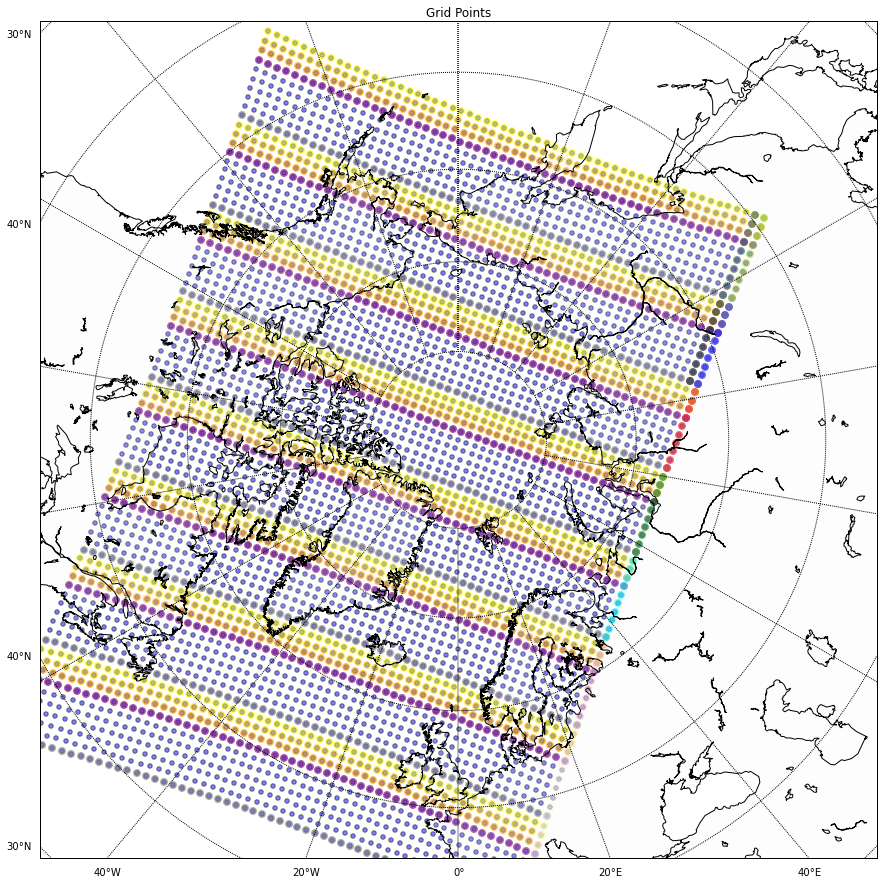

In [13]:
input_x=[]#[32+3,8*8+3,19,2    ,2+9*8,2+8*1,2+8*8,2+7*8,2+4*8,2+3*8,4+3*8]
input_y=[]#[40+5,5,    13,4*8+8,7+2*8,8+3*8,7+3*8,7+5*8,7+6*8,7+6*8,2+6*8]

# the numbers above are useless
file_num=11
color=['red','brown','yellow','pink','green','purple','PapayaWhip','grey','chocolate','Lavender','CadetBlue']

drawmap(input_x,input_y,color)

In [14]:
#rearrange lon_ice,lat_ice

iconlat=np.empty([80,58])
iconlon=np.empty([80,58])

for j in range (58):
    for k in range (8):
            iconlat[k*10:(k+1)*10,j]=lat_ice[:,j*8+k]
            iconlon[k*10:(k+1)*10,j]=lon_ice[:,j*8+k]

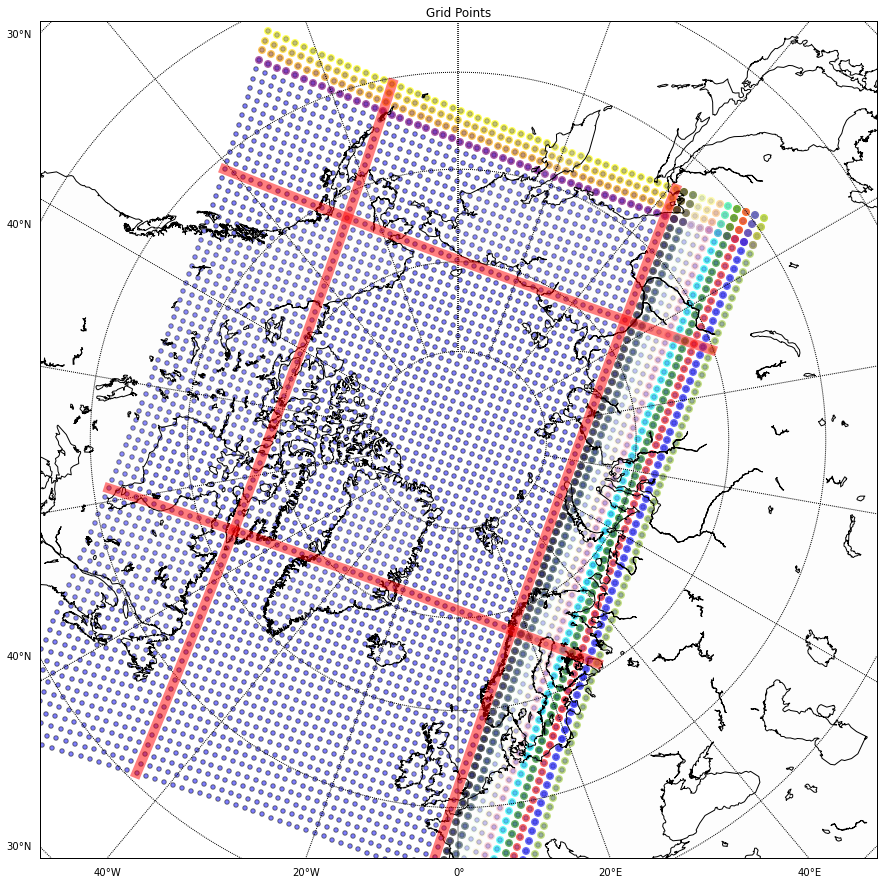

In [23]:
fig = plt.figure(figsize=(15,15))
m = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
m.drawcoastlines()

m.fillcontinents(color = '0.95',alpha=0.1)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])

x,y= m(iconlon,iconlat)
m.scatter(x,y,alpha=0.5)

#10
m.scatter(x[0,:],y[0,:],s=50,color='yellow',alpha=0.5)
m.scatter(x[1,:],y[1,:],s=50,color='gold',alpha=0.5)
m.scatter(x[2,:],y[2,:],s=50,color='orange',alpha=0.5)
m.scatter(x[3,:],y[3,:],s=50,color='purple',alpha=0.5)


#464
m.scatter(x[:,0],y[:,0],s=50,color='yellowgreen',alpha=0.5)
m.scatter(x[:,1],y[:,1],s=50,color='b',alpha=0.5)
m.scatter(x[:,2],y[:,2],s=50,color='r',alpha=0.5)
m.scatter(x[:,3],y[:,3],s=50,color='g',alpha=0.5)
m.scatter(x[:,4],y[:,4],s=50,color='cyan',alpha=0.5)
m.scatter(x[:,5],y[:,5],s=50,color='pink',alpha=0.5)
m.scatter(x[:,6],y[:,6],s=50,color='Cornsilk',alpha=0.5)
m.scatter(x[:,7],y[:,7],s=50,color='Honeydew',alpha=0.5)
m.scatter(x[:,8],y[:,8],s=50,color='DarkSlateGray',alpha=0.5)
m.scatter(x[:,9],y[:,9],s=50,color='Black',alpha=0.5)

#zoom in
m.plot(x[52,:],y[52,:],color='r',lw=10,alpha=0.5)
m.plot(x[15,:],y[15,:],color='r',lw=10,alpha=0.5)
m.plot(x[:,10],y[:,10],color='r',lw=10,alpha=0.5)
m.plot(x[:,-15],y[:,-15],color='r',lw=10,alpha=0.5)



plt.title("Grid Points")
#plt.legend(loc=1,fontsize=11,scatterpoints=1)
plt.show()

In [16]:
filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/findk/ice_concentration/01/*9'))
icon=np.empty([80,58])
for k in range(1):
    file_source=open(filename[k])
    line_content = file_source.readlines()
    for i in range (58):
        split=map(''.join, zip(*[iter(line_content[i])]))
        for j in range (len(split)-1):
            if split[j]=='*':
                split[j]=10
            if split[j]=='.':
                split[j]=-1
            icon[j,i]=split[j] 

In [17]:
print icon[40,:]
icon=np.ma.masked_where(icon<0,icon)
icon=np.ma.masked_where(np.isnan(icon),icon)
print icon[40,:]

[ -1.  -1.  -1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   5.   7.   8.   9.  10.  10.  10.  10.  10.  10.  10.  -1.
  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.   0.   0.   0.  -1.  -1.  -1.
  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]
[-- -- -- 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 5.0
 7.0 8.0 9.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 -- -- -- -- -- -- -- -- --
 0.0 0.0 0.0 0.0 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --]


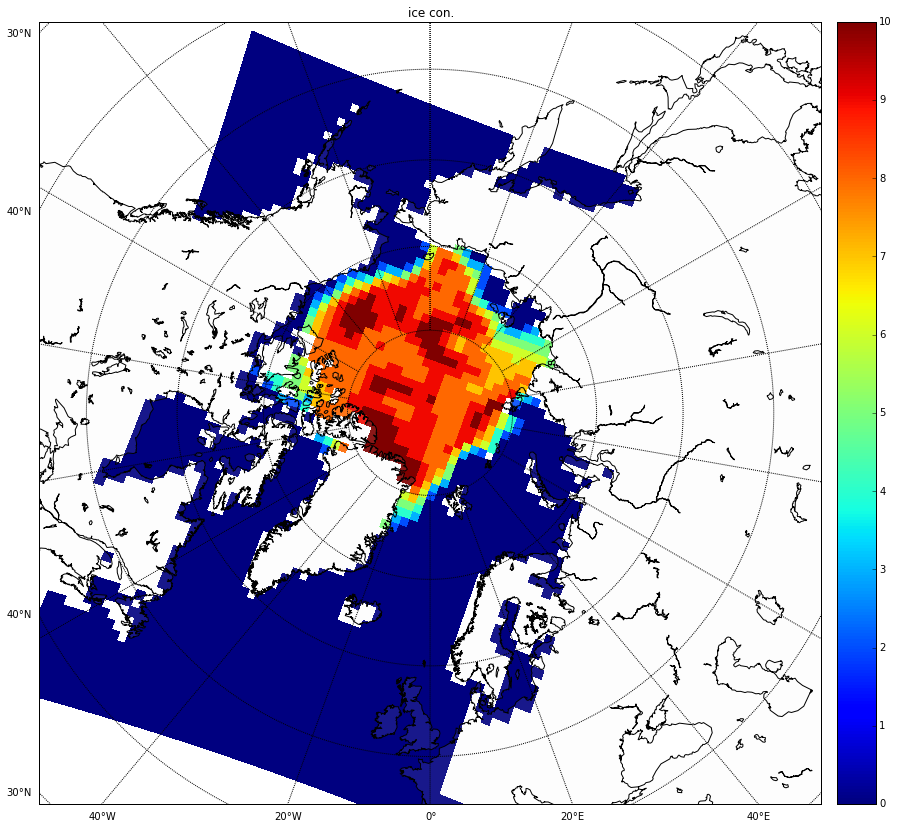

In [18]:
fig = plt.figure(figsize=(15,15))
m = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
m.drawcoastlines()

m.fillcontinents(color = '0.95',alpha=0.1)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])

x,y= m(iconlon,iconlat)
m.pcolor(x,y,icon,vmin=0, vmax=10)
m.colorbar()

plt.title("ice con.")
#plt.legend(loc=1,fontsize=11,scatterpoints=1)
plt.show()

In [19]:
from scipy.interpolate import griddata
from scipy.interpolate import Rbf

In [24]:
coordinate_name=glob.glob('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/*coor*.nc')
coordinate_obj=nc.Dataset(coordinate_name[0])
nav_lon=coordinate_obj.variables['nav_lon'][:,:]
nav_lat=coordinate_obj.variables['nav_lat'][:,:]
m = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
x_lon,y_lat = m(nav_lon, nav_lat)

rbf = Rbf(x[15:52,10:-15], y[15:52,10:-15], icon[15:52,10:-15], epsilon=2)
icon_ = rbf(x_lon[400:,:], y_lat[400:,:])

icon_[icon_ < 0] = 0

In [28]:
bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][400:,:]

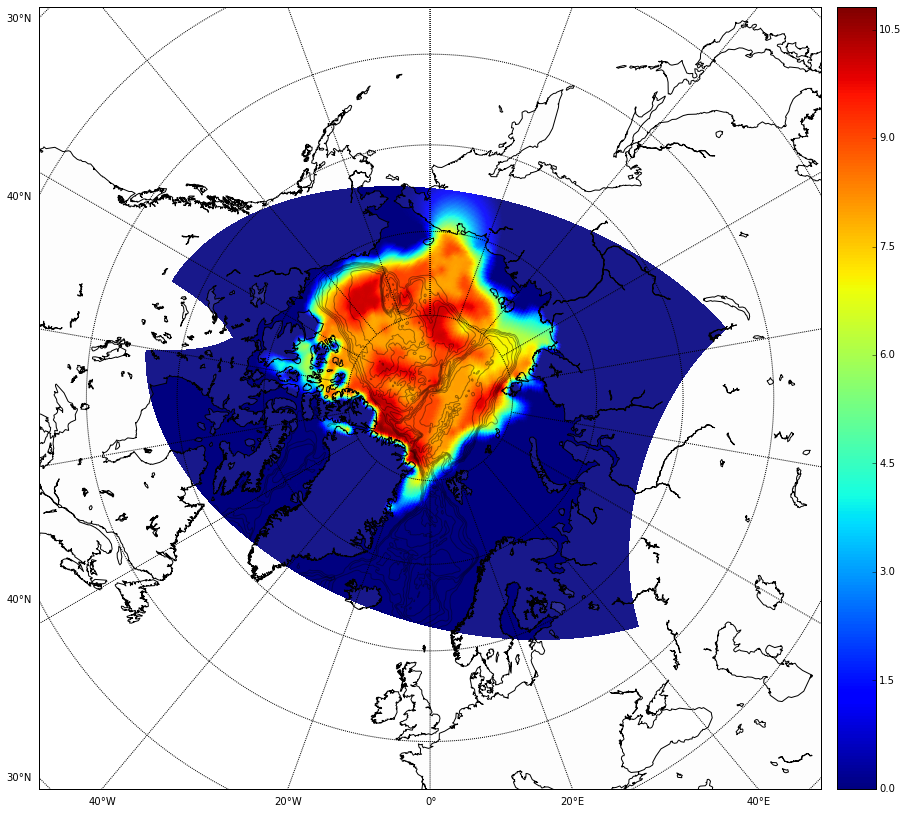

In [29]:
fig = plt.figure(figsize=(15,15))
m = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
m.drawcoastlines()

m.fillcontinents(color = '0.95',alpha=0.1)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
m.contour(x_lon[400:,:],y_lat[400:,:],bathy,linewidth=0.075,colors='black',alpha=0.4)
m.pcolor(x_lon[400:,:],y_lat[400:,:],icon_)
m.colorbar()
#plt.legend(loc=1,fontsize=11,scatterpoints=1)
plt.show()

In [26]:
icon_ANHA=np.zeros((800,544))
icon_ANHA[400:,:]=icon_/10.

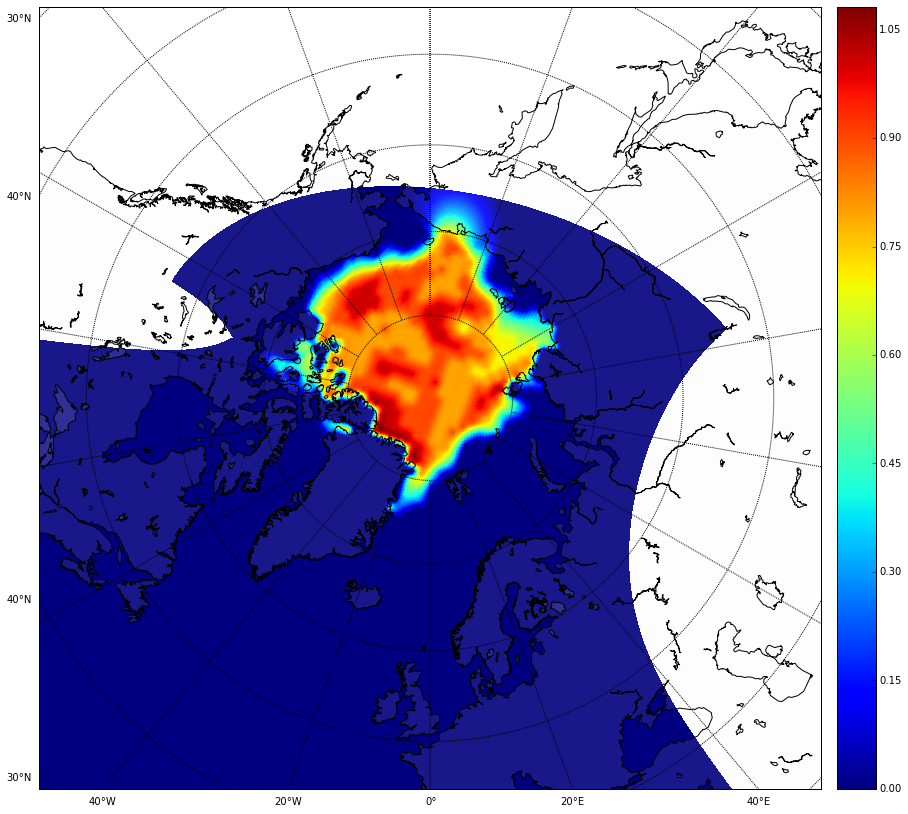

In [27]:
fig = plt.figure(figsize=(15,15))
m = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
m.drawcoastlines()

m.fillcontinents(color = '0.95',alpha=0.1)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])

m.pcolor(x_lon,y_lat,icon_ANHA)
m.colorbar()

plt.show()

In [30]:
lat = nav_lat
lon = nav_lon
print lat.shape
xmax = lat.shape[1]
ymax = lat.shape[0]


nemo = nc.Dataset('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/Cryosphere2d_ANHA4-EXH001_icemod_y2001m09.nc', 'w')
nemo.description = 'ice' 

# dimensions
nemo.createDimension('x', xmax)
nemo.createDimension('y', ymax)
nemo.createDimension('time_counter', None)

# variables
# latitude and longitude
nav_lat = nemo.createVariable('nav_lat','float32',('y','x'),zlib=True)
nav_lat = lat
x = nemo.createVariable('nav_lon','float32',('y','x'),zlib=True)
nav_lon = lon
# time
time_counter = nemo.createVariable('time_counter', 'float32', ('time_counter'),zlib=True)
time_counter.units = 'non-dim'
time_counter[0] = 1
# runoff
Pa = nemo.createVariable('ileadfra', 'float32', ('y','x'), zlib=True)
Pa._units = 'arbitrary'
Pa[:,:]=icon_ANHA[:,:]
nemo.close()



(800, 544)


In [25]:
ymax

800